Given an array of non-negative integers, you are initially positioned at the first index of the array.

Each element in the array represents your maximum jump length at that position.

Determine if you are able to reach the last index.

Example 1:

    Input: [2,3,1,1,4]
    Output: true
Explanation: Jump 1 step from index 0 to 1, then 3 steps to the last index.
Example 2:

    Input: [3,2,1,0,4]
    Output: false
Explanation: You will always arrive at index 3 no matter what. Its maximum
             jump length is 0, which makes it impossible to reach the last index.

## Naming
We call a position in the array a "good index" if starting at that position, we can reach the last index. Otherwise, that index is called a "bad index". The problem then reduces to whether or not index 0 is a "good index".
Solution
This is a dynamic programming[1] question. Usually, solving and fully understanding a dynamic programming problem is a 4 step process:

Start with the recursive backtracking solution
Optimize by using a memoization table (top-down[3] dynamic programming)
Remove the need for recursion (bottom-up dynamic programming)
Apply final tricks to reduce the time / memory complexity
All solutions presented below produce the correct result, but they differ in run time and memory requirements. 


### Approach 1: Backtracking

This is the inefficient solution where we try every single jump pattern that takes us from the first position to the last. We start from the first position and jump to every index that is reachable. We repeat the process until last index is reached. When stuck, backtrack.

    public class Solution {
        public boolean canJumpFromPosition(int position, int[] nums) {
            if (position == nums.length - 1) {
                return true;
            }

            int furthestJump = Math.min(position + nums[position], nums.length - 1);
            for (int nextPosition = position + 1; nextPosition <= furthestJump; nextPosition++) {
                if (canJumpFromPosition(nextPosition, nums)) {
                    return true;
                }
            }

            return false;
        }

        public boolean canJump(int[] nums) {
            return canJumpFromPosition(0, nums);
        }
    }
    
One quick optimization we can do for the code above is to check the nextPosition from right to left. The theoretical worst case performance is the same, but in practice, for silly examples, the code might run faster. Intuitively, this means we always try to make the biggest jump such that we reach the end as soon as possible

The change required is:

    // Old
    for (int nextPosition = position + 1; nextPosition <= furthestJump; nextPosition++)
    // New
    for (int nextPosition = furthestJump; nextPosition > position; nextPosition--)
    
For instance, in the example below, if we start from index 0, jump as far as possible and reach 1, jump as far as possible and reach 6. By doing so, we determine that 0 is a GOOD index in 3 steps.

    Index	0	1	2	3	4	5	6
    nums	1	5	2	1	0	2	0
    
To illustrate the worst case, where this optimization has no effect, take the example below. Index 6 cannot be reached from any position, but all combinations will be tried.

    Index	0	1	2	3	4	5	6
    nums	5	4	3	2	1	0	0
    
The first few steps of the backtracking algorithm for the example above are: 0 -> 4 -> 5 -> 4 -> 0 -> 3 -> 5 -> 3 -> 4 -> 5 -> etc.

#### Complexity Analysis

- Time complexity : O(2^n). There are 2^n (upper bound) ways of jumping from the first position to the last, where nn is the length of array nums. For a complete proof, please refer to Appendix A.

- Space complexity : O(n). Recursion requires additional memory for the stack frames. 



### Approach 2: Dynamic Programming Top-down

Top-down Dynamic Programming can be thought of as optimized backtracking. It relies on the observation that once we determine that a certain index is good / bad, this result will never change. This means that we can store the result and not need to recompute it every time.

Therefore, for each position in the array, we remember whether the index is good or bad. Let's call this array memo and let its values be either one of: GOOD, BAD, UNKNOWN. This technique is called memoization[2].

An example of a memoization table for input array **nums = [2, 4, 2, 1, 0, 2, 0]** can be seen in the diagram below. We write G for a GOOD position and B for a BAD one. We can see that we cannot start from indices 2, 3 or 4 and eventually reach last index (6), but we can do that from indices 0, 1, 5 and (trivially) 6.

    Index	0	1	2	3	4	5	6
    nums	2	4	2	1	0	2	0
    memo	G	G	B	B	B	G	G
    
    
**Steps**

1. Initially, all elements of the memo table are UNKNOWN, except for the last one, which is (trivially) GOOD (it can reach itself)
2. Modify the backtracking algorithm such that the recursive step first checks if the index is known (GOOD / BAD)
    - If it is known then return True / False
    - Otherwise perform the backtracking steps as before
3. Once we determine the value of the current index, we store it in the **memo** table


        enum Index {
            GOOD, BAD, UNKNOWN
        }

        public class Solution {
            Index[] memo;

            public boolean canJumpFromPosition(int position, int[] nums) {
                if (memo[position] != Index.UNKNOWN) {
                    return memo[position] == Index.GOOD ? true : false;
                }

                int furthestJump = Math.min(position + nums[position], nums.length - 1);
                for (int nextPosition = position + 1; nextPosition <= furthestJump; nextPosition++) {
                    if (canJumpFromPosition(nextPosition, nums)) {
                        memo[position] = Index.GOOD;
                        return true;
                    }
                }

                memo[position] = Index.BAD;
                return false;
            }

            public boolean canJump(int[] nums) {
                memo = new Index[nums.length];
                for (int i = 0; i < memo.length; i++) {
                    memo[i] = Index.UNKNOWN;
                }
                memo[memo.length - 1] = Index.GOOD;
                return canJumpFromPosition(0, nums);
            }
        }
        
#### Complexity Analysis

- Time complexity : _O(n^2)_. For every element in the array, say i, we are looking at the next nums[i] elements to its right aiming to find a GOOD index. nums[i] can be at most _n_, where _n_ is the length of array nums.

- Space complexity : _O(2n)_=_O(n)_. First _n_ originates from recursion. Second _n_ comes from the usage of the memo table. 


### Approach 3: Dynamic Programming Bottom-up

Top-down to bottom-up conversion is done by eliminating recursion. In practice, this achieves better performance as we no longer have the method stack overhead and might even benefit from some caching. More importantly, this step opens up possibilities for future optimization. The recursion is usually eliminated by trying to reverse the order of the steps from the top-down approach.

The observation to make here is that we only ever jump to the right. This means that if we start from the right of the array, every time we will query a position to our right, that position has already be determined as being GOOD or BAD. This means we don't need to recurse anymore, as we will always hit the memo table.

    enum Index {
    GOOD, BAD, UNKNOWN
    }

    public class Solution {
        public boolean canJump(int[] nums) {
            Index[] memo = new Index[nums.length];
            for (int i = 0; i < memo.length; i++) {
                memo[i] = Index.UNKNOWN;
            }
            memo[memo.length - 1] = Index.GOOD;

            for (int i = nums.length - 2; i >= 0; i--) {
                int furthestJump = Math.min(i + nums[i], nums.length - 1);
                for (int j = i + 1; j <= furthestJump; j++) {
                    if (memo[j] == Index.GOOD) {
                        memo[i] = Index.GOOD;
                        break;
                    }
                }
            }

            return memo[0] == Index.GOOD;
        }
    }
    
#### Complexity Analysis

- Time complexity : O(n^2). For every element in the array, say i, we are looking at the next nums[i] elements to its right aiming to find a GOOD index. nums[i] can be at most nn, where nn is the length of array nums.

- Space complexity : O(n). This comes from the usage of the memo table. 

### Approach 4: Greedy

Once we have our code in the bottom-up state, we can make one final, important observation. From a given position, when we try to see if we can jump to a GOOD position, we only ever use one - the first one (see the break statement). In other words, the left-most one. If we keep track of this left-most GOOD position as a separate variable, we can avoid searching for it in the array. Not only that, but we can stop using the array altogether.

Iterating right-to-left, for each position we check if there is a potential jump that reaches a GOOD index (currPosition + nums[currPosition] >= leftmostGoodIndex). If we can reach a GOOD index, then our position is itself GOOD. Also, this new GOOD position will be the new leftmost GOOD index. Iteration continues until the beginning of the array. If first position is a GOOD index then we can reach the last index from the first position.

To illustrate this scenario, we will use the diagram below, for input array nums = [9, 4, 2, 1, 0, 2, 0]. We write G for GOOD, B for BAD and U for UNKNOWN. Let's assume we have iterated all the way to position 0 and we need to decide if index 0 is GOOD. Since index 1 was determined to be GOOD, it is enough to jump there and then be sure we can eventually reach index 6. It does not matter that nums[0] is big enough to jump all the way to the last index. All we need is one way.

    Index	0	1	2	3	4	5	6
    nums	9	4	2	1	0	2	0
    memo	U	G	B	B	B	G	G
    
    public class Solution {
        public boolean canJump(int[] nums) {
            int lastPos = nums.length - 1;
            for (int i = nums.length - 1; i >= 0; i--) {
                if (i + nums[i] >= lastPos) {
                    lastPos = i;
                }
            }
            return lastPos == 0;
        }
    }
    
#### Complexity Analysis

- Time complexity : O(n). We are doing a single pass through the nums array, hence nn steps, where nn is the length of array nums.

- Space complexity : O(1). We are not using any extra memory.


### Conclusion

The question left unanswered is how should one approach such a question in an interview scenario. I would say "it depends". The perfect solution is cleaner and shorter than all the other versions, but it might not be so straightforward to figure out.

The (recursive) backtracking is the easiest to figure out, so it is worth mentioning it verbally while warming up for the tougher challenge. It might be that your interviewer actually wants to see that solution, but if not, mention that there might be a dynamic programming solution and try to think how could you use a memoization table. If you figure it out and the interviewer wants you to go for the top-down approach, it will not generally be time to think of the bottom-up version, but I would always mention the advantages of this technique as a final thought in the interview.

Most people are stuck when converting from top-down Dynamic Programming (expressed naturally in recursion) to bottom-up. Practicing similar problems will help bridge this gap.


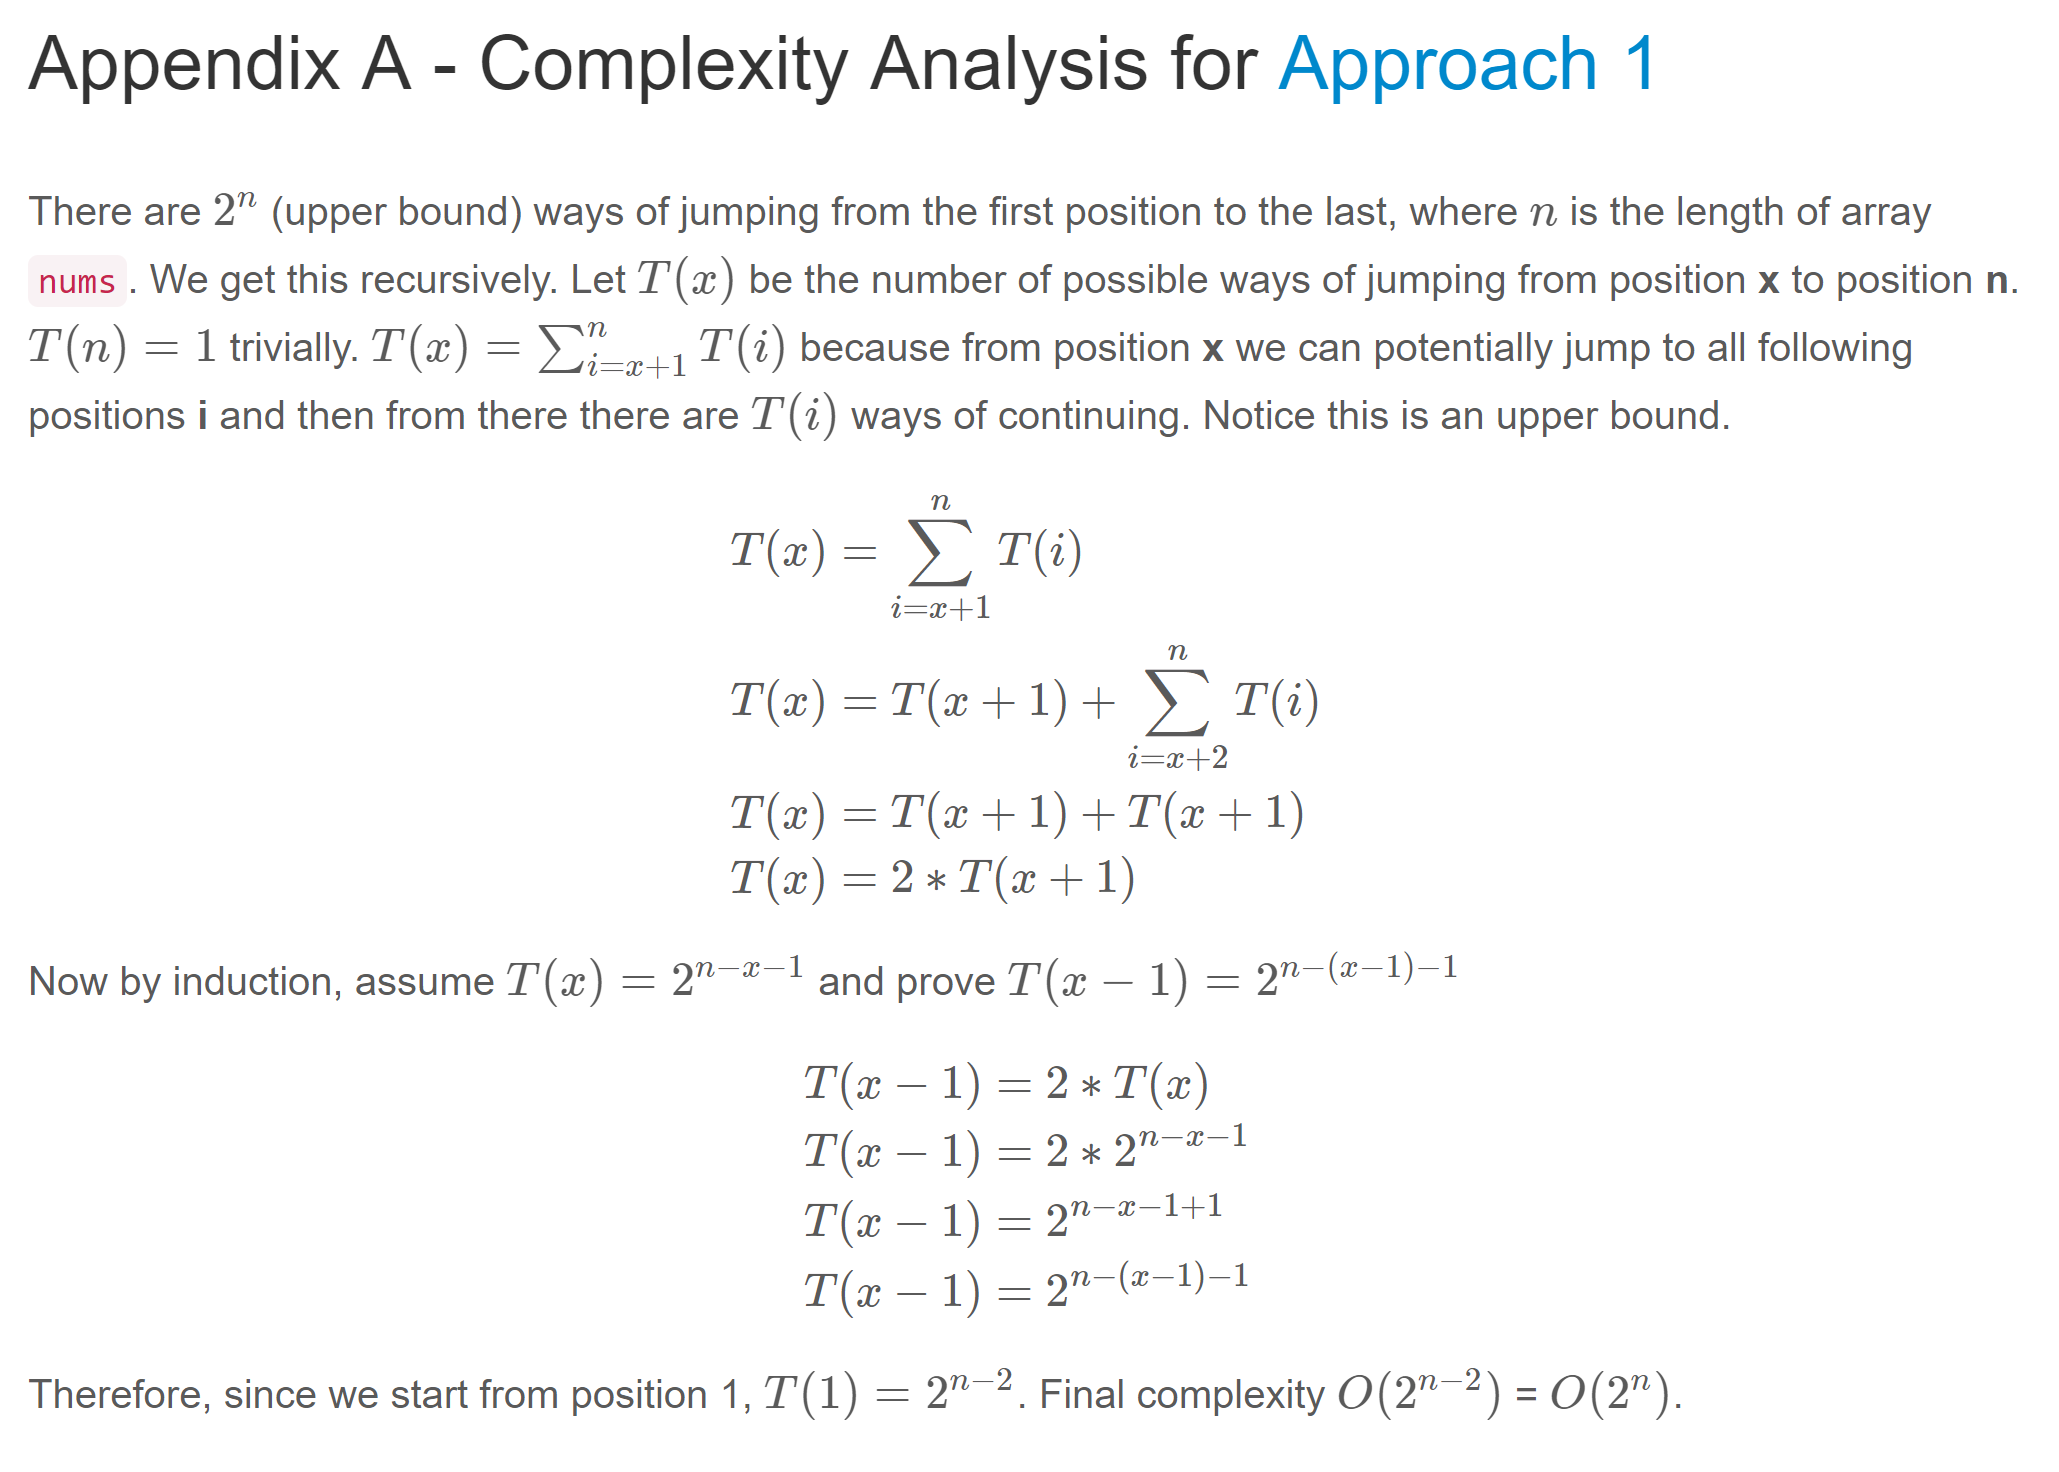

In [ ]:
def canJump(self, nums):
    """
    :type nums: List[int]
    :rtype: bool
    """
    if not nums: return False

    last=len(nums)-1

    for i in range(len(nums)-1,-1,-1):
        if i + nums[i] >= last:
            last = i

    return last==0